<a href="https://colab.research.google.com/github/mirco-heidemann/NGFS/blob/main/NGFS_EnTryTemplate_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NGFS Data Report Template
---

*Launch Version (1.0)*

---

For feedback, please participate in our user standing survey [here](https://www.surveymonkey.de/r/C68V37M).

---
This script provides code to quickly access, visualise and export data of the NGFS Scenarios as a descriptive PDF report. This code works identically in any python IDE when downloaded. Nonetheless, the advantage of this browser-based interface (Google Colab) is that no installation is needed, which may be problematic within some institutional infrastructures.

---

This notebook is *view only*. To **run this Colab notebook**, either:

- [By default] **Run in playground mode:**  Otherwise try File > Open in playground mode (Changes will not be saved, however data and visualisations can be downloaded)
- **Make a copy to your Google Drive so you can make local changes:** File > Save a copy in Drive, or open a new notebook File > New Notebook to copy the code and create your own script (not possible if Google Drive is blocked by firewalls or security)
- **Download the script as Jupyter notebook, so you can run it on your computer configured with Jupyter:** File > Download .ipynb (not possible if Google Drive is blocked by firewalls or security)


---
---

*The code is based on an open-source Python package pyam-iamc. For guidance and documentation on the pyam-iamc package refer to information provided [here](https://pyam-iamc.readthedocs.io/en/stable/index.html).*

*For support on undocumented problems in Pyam please raise the issue in the [GitHub Forum](https://github.com/IAMconsortium/pyam/issues) or join the [Slack Community](https://pyam-iamc.slack.com/join/shared_invite/zt-1xapbpjw3-hfVe7dJ16U1DtxibB65H1Q#/shared-invite/email)* and raise the issue in the #helpdesk.

*For support on the use of Google Colab, please refer to the [FAQ](https://research.google.com/colaboratory/faq.html).*

*For questions and comments on the NGFS scripts and their application, please reach out to Clemens Lehofer (clemens-maria.lehofer@ecb.europa.eu) or Mario Morelli (mario.morelli@ecb.europa.eu).*

---
---

***When using this script, ensure to run all cells in order as they appear.***

# Initialisation

To start your connection, click the run button below and run the initialisation code cells. (The loading can take up to one minute.)

In [ ]:
!pip install ixmp4
!pip install pyam-iamc
import pyam
import ixmp4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

<IPython.core.display.Javascript object>

In [ ]:
# IMPORT THE NGFS FONT STYLE

from matplotlib import font_manager as fm, pyplot as plt

!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-Regular.ttf
!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-It.ttf
!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-Bold.ttf

font_files = fm.findSystemFonts('.')

for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='Myriad Pro')


#SET THE GENERAL NGFS COLOR PALETTE

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def create_custom_colormap(colors, name='custom_colormap'):
    n_bins = 20  # Number of bins in the colormap
    cmap = LinearSegmentedColormap.from_list(name, colors, N=n_bins)
    return cmap

ngfs_colors = ['#BFC80F','#6F7374', '#F37022', '#B00069', '#016BAB', '#009BA3']

ngfs_cmap = create_custom_colormap(ngfs_colors)


# ASSIGN SPECIFIC COLORS TO SPECIFIC PARAMETERS - these settings are superior to any general color palette i.e. cmap

color_map = {
'ngfs_phase_2':'#6F7374',
'ngfs_phase_3':'#BFC80F',
'ngfs_phase_4': '#009BA3',
'GCAM 6.0 NGFS': '#009BA3',
'GCAM': '#009BA3',
'REMIND': '#6F7374',
'REMIND-MAgPIE 3.2-4.6': '#6F7374',
'REMIND-MAgPIE 3.1-4.6': '#6F7374',
'MESSAGEix-GLOBIOM 1.1-M-R12': '#BFC80F',
'MESSAGE': '#BFC80F',
'GCAM 5.3+ NGFS': '#81C9CD',
'REMIND-MAgPIE 3.0-4.4': '#B9B9B9',
'MESSAGEix-GLOBIOM 1.1-M-R12': '#BFC80F',
'NiGEM NGFS v1.22 [GCAM 5.3+ NGFS]': '#81C9CD',
'NiGEM NGFS v1.22 [REMIND-MAgPIE 3.0-4.4]': '#B9B9B9',
'NiGEM NGFS v1.22 [MESSAGEix-GLOBIOM 1.1-M-R12]': '#EDF466',
'NiGEM NGFS v1.23.1[GCAM 6.0 NGFS]': '#009BA3',
'NiGEM NGFS v1.23.1[REMIND-MAgPIE 3.2-4.6]': '#6F7374',
'NiGEM NGFS v1.23.1 [MESSAGEix-GLOBIOM 1.1-M-R12]': '#BFC80F',
'NiGEM NGFS v1.23.2[GCAM 6.0 NGFS]': '#009BA3',
'NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]': '#6F7374',
'NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12]': '#BFC80F',
'NiGEM NGFS v1.23.2\[GCAM 6.0 NGFS\]': '#009BA3',
'NiGEM NGFS v1.23.2\[REMIND-MAgPIE 3.2-4.6\]': '#6F7374',
'NiGEM NGFS v1.23.2\[MESSAGEix-GLOBIOM 1.1-M-R12\]': '#BFC80F',
'NiGEM NGFS v1.23.2\\[MESSAGEix-GLOBIOM 1.1-M-R12\\]': '#BFC80F',
'Fragmented World': '#E20081',
'd_delfrag': '#009BA3',
'd_strain': '#E20081',
'h_cpol': '#6F7374',
'h_ndc': '#F37022',
'o_1p5c': '#BFC80F',
'o_2c': '#016BAB',
'Current Policies': '#6F7374',
'Delayed transition': '#009BA3',
'Divergent Net Zero': '#B00069',
'Nationally Determined Contributions (NDCs)': '#F37022',
'Nationally Determined Contributions (NDCs) ': '#F37022',
'Current Policies ': '#6F7374',
'NDCs': '#F37022',
'Net Zero 2050': '#BFC80F',
'Below 2?C': '#016BAB',
'Below 2°C': '#016BAB',
'o_lowdem':'#E88ECC',
'Low Demand':'#E88ECC',
'NiGEM NGFS v1.23.2|United States': '#009BA3',
'NiGEM NGFS v1.23.2|Developing Europe': '#6F7374',
'NiGEM NGFS v1.23.2|Asia': '#BFC80F',
'NiGEM NGFS v1.23.2|Latin America': '#B00069',
'NiGEM NGFS v1.23.2|Europe': '#F37022',
'NiGEM NGFS v1.23.2|Africa': '#FF75C7',
'NiGEM NGFS v1.22|United States': '#009BA3',
'NiGEM NGFS v1.22|Developing Europe': '#6F7374',
'NiGEM NGFS v1.22|Asia': '#BFC80F',
'NiGEM NGFS v1.22|Latin America': '#B00069',
'NiGEM NGFS v1.22|Europe': '#F37022',
'NiGEM NGFS v1.22|Africa': '#FF75C7',
'Latin America (R5)': '#B00069',
'Asia (R5)': '#BFC80F',
'Middle East & Africa (R5)': '#FF75C7',
'OECD & EU (R5)': '#F37022',
'Reforming Economies (R5)': '#6F7374',
'Latin America': '#B00069',
'Asia': '#BFC80F',
'Middle East & Africa (R5)': '#FF75C7',
'Africa': '#FF75C7',
'Europe': '#F37022',
'Developing Europe': '#6F7374',
'World': '#016BAB',
'NiGEM NGFS v1.22|World': '#016BAB',
'Emissions|CO2|AFOLU': '#B00069',
'Emissions|CO2|Energy|Demand|Industry': '#F37022',
'Emissions|CO2|Energy|Demand|Residential and Commercial': '#BFC80F',
'Emissions|CO2|Energy|Demand|Transportation': '#016BAB',
'Emissions|CO2|Energy|Supply': '#009BA3',
'NiGEM|Gross Domestic Product (GDP)|Acute physical': '#6F7374',
'NiGEM|Gross Domestic Product (GDP)|Chronic physical': '#009BA3',
'NiGEM|Gross Domestic Product (GDP)|Combined': '#016BAB',
'NiGEM|Gross Domestic Product (GDP)|Transition': '#BFC80F',
'NiGEM|Gross Domestic Product (GDP)|Acute physical': '#6F7374',
'Gross Domestic Product (GDP)(chronic)': '#009BA3',
'Gross Domestic Product (GDP)(combined)': '#016BAB',
'Gross Domestic Product (GDP)(transition)': '#BFC80F',
'Gross Domestic Product (GDP)(acute)': '#6F7374',
'Average': '#F37022',
'Max': '#BFC80F',
'Min': '#009BA3'
}

import matplotlib as mpl #account for the missing minus sign in the font, Replace it with a hyphen
mpl.rcParams['axes.unicode_minus'] = False

pyam.run_control().update({'color': {'model': color_map}})
pyam.run_control().update({'color': {'scenario': color_map}})
pyam.run_control().update({'color': {'region': color_map}})
pyam.run_control().update({'color': {'variable': color_map}})

--2023-11-07 08:08:01--  https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-Regular.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fontfen/myriad-pro/master/MyriadPro-Regular.ttf [following]
--2023-11-07 08:08:01--  https://raw.githubusercontent.com/fontfen/myriad-pro/master/MyriadPro-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31872 (31K) [application/octet-stream]
Saving to: ‘MyriadPro-Regular.ttf’

MyriadPro-Regular.t 100%[===================>]  31.12K  --.-KB/s    in 0.001s  

2023-11-07 08:08:01 (30.8 MB/s) - ‘MyriadPro-Regular.ttf’ saved [31872/31872]

--2023-1

# Data query

In [ ]:
# PHASE 4
# CONFIRM respective parameter names WHEN Phase FINAL!
df_p4 = pyam.read_iiasa(
    'ngfs_phase_4',
    model=['MESSAGEix-GLOBIOM 1.1-M-R12','REMIND-MAgPIE 3.2-4.6', 'GCAM 6.0 NGFS'],
    variable=['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile', 'Carbon Sequestration*', 'Temperature|Global Mean', 'Emissions|CO2*','Emissions|Kyoto Gases*', 'Price|Carbon*', 'Primary Energy*', 'Investment|Energy Supply*', 'Capital Cost|Electricity|Solar|PV']
)
summary = {}
summary['Models'] = df_p4.model
summary['Variables'] = df_p4.variable
summary['Regions'] = df_p4.region
summary['Scenarios'] = df_p4.scenario

from tabulate import tabulate
table = list(summary.items())
print(tabulate(table, headers=['Column', 'Parameters - Phase 4'], tablefmt='fancy_grid'))

ixmp4.conf.settings - INFO: Connecting as user 'clehofer'.
pyam.iiasa - INFO: You are connected to the IXSE_NGFS_PHASE_4 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as user `clehofer`


╒═══════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [ ]:
df_nigem_p4 = pyam.read_iiasa(
    'ngfs_phase_4',
    model=["NiGEM NGFS v1.23.2\[GCAM 6.0 NGFS\]","NiGEM NGFS v1.23.2\[REMIND-MAgPIE 3.2-4.6\]", "NiGEM NGFS v1.23.2\[MESSAGEix-GLOBIOM 1.1-M-R12\]", 'NiGEM NGFS v1.23.2\[Climate Analytics\]'],
    variable=['Central bank Intervention rate (policy interest rate) ; %(combined)', 'Central bank Intervention rate (policy interest rate) ; %(chronic)', 'Gross Domestic Product (GDP)(chronic)', 'Gross Domestic Product (GDP)(transition)', 'Gross Domestic Product (GDP)(combined)','Inflation rate ; %(combined)','Inflation rate ; %(chronic)', 'Gross Domestic Product (GDP)(drought-60)','Gross Domestic Product (GDP)(drought-99)', 'Gross Domestic Product (GDP)(drought-90)', 'Gross Domestic Product (GDP)(heatwave-90)','Gross Domestic Product (GDP)(heatwave-60)','Gross Domestic Product (GDP)(heatwave-99)', 'Gross Domestic Product (GDP)(cyclone-90)', 'Gross Domestic Product (GDP)(cyclone-60)', 'Gross Domestic Product (GDP)(cyclone-99)', 'Gross Domestic Product (GDP)(flood)', 'Unemployment rate ; %(combined)','Unemployment rate ; %(transition)','Unemployment rate ; %(chronic)', 'Long term interest rate ; %(combined)', 'Long term interest rate ; %(chronic)', 'Long term interest rate ; %(transition)'],
    region=['NiGEM NGFS v1.23.2|Africa', 'NiGEM NGFS v1.23.2|Argentina', 'NiGEM NGFS v1.23.2|Asia', 'NiGEM NGFS v1.23.2|Australia', 'NiGEM NGFS v1.23.2|Austria', 'NiGEM NGFS v1.23.2|Belgium', 'NiGEM NGFS v1.23.2|Brazil', 'NiGEM NGFS v1.23.2|Bulgaria', 'NiGEM NGFS v1.23.2|Canada', 'NiGEM NGFS v1.23.2|Chile', 'NiGEM NGFS v1.23.2|China', 'NiGEM NGFS v1.23.2|Croatia', 'NiGEM NGFS v1.23.2|Czech Republic', 'NiGEM NGFS v1.23.2|Denmark', 'NiGEM NGFS v1.23.2|Developing Europe', 'NiGEM NGFS v1.23.2|Egypt', 'NiGEM NGFS v1.23.2|Estonia', 'NiGEM NGFS v1.23.2|Europe', 'NiGEM NGFS v1.23.2|Finland', 'NiGEM NGFS v1.23.2|France', 'NiGEM NGFS v1.23.2|Germany', 'NiGEM NGFS v1.23.2|Greece', 'NiGEM NGFS v1.23.2|Hong Kong', 'NiGEM NGFS v1.23.2|Hungary', 'NiGEM NGFS v1.23.2|India', 'NiGEM NGFS v1.23.2|Indonesia', 'NiGEM NGFS v1.23.2|Ireland', 'NiGEM NGFS v1.23.2|Italy', 'NiGEM NGFS v1.23.2|Japan', 'NiGEM NGFS v1.23.2|Latin America', 'NiGEM NGFS v1.23.2|Latvia', 'NiGEM NGFS v1.23.2|Lithuania', 'NiGEM NGFS v1.23.2|Malaysia', 'NiGEM NGFS v1.23.2|Mexico', 'NiGEM NGFS v1.23.2|Middle East', 'NiGEM NGFS v1.23.2|Netherlands', 'NiGEM NGFS v1.23.2|New Zealand', 'NiGEM NGFS v1.23.2|Norway', 'NiGEM NGFS v1.23.2|Poland', 'NiGEM NGFS v1.23.2|Portugal', 'NiGEM NGFS v1.23.2|Romania', 'NiGEM NGFS v1.23.2|Russia', 'NiGEM NGFS v1.23.2|Singapore', 'NiGEM NGFS v1.23.2|Slovakia', 'NiGEM NGFS v1.23.2|Slovenia', 'NiGEM NGFS v1.23.2|South Africa', 'NiGEM NGFS v1.23.2|South Korea', 'NiGEM NGFS v1.23.2|Spain', 'NiGEM NGFS v1.23.2|Sweden', 'NiGEM NGFS v1.23.2|Switzerland', 'NiGEM NGFS v1.23.2|Taiwan', 'NiGEM NGFS v1.23.2|Turkey', 'NiGEM NGFS v1.23.2|United Kingdom', 'NiGEM NGFS v1.23.2|United States', 'NiGEM NGFS v1.23.2|Viet Nam', 'NiGEM NGFS v1.23.2|World'],
    scenario = ['d_delfrag', 'd_strain', 'h_cpol', 'h_ndc', 'o_1p5c', 'o_2c']
)
summary = {}
summary['Models'] = df_nigem_p4.model
summary['Variables'] = df_nigem_p4.variable
summary['Regions'] = df_nigem_p4.region
summary['Scenarios'] = df_nigem_p4.scenario

from tabulate import tabulate
table = list(summary.items())
print(tabulate(table, headers=['Column', 'Parameters - Phase 4 NiGEM'], tablefmt='fancy_grid'))

pyam.iiasa - INFO: You are connected to the IXSE_NGFS_PHASE_4 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as user `clehofer`


╒═══════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [ ]:
# PHASE 3
df_p3 = pyam.read_iiasa(
    'ngfs_phase_3',
    model=['MESSAGEix-GLOBIOM 1.1-M-R12','REMIND-MAgPIE 3.0-4.4', 'GCAM 5.3+ NGFS'],
    variable=['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile', 'Carbon Sequestration*', 'Temperature|Global Mean', 'Emissions|CO2*', 'Price|Carbon*', 'Primary Energy*', 'Investment|Energy Supply*', 'Capital Cost|Electricity|Solar|PV']
)
summary = {}
summary['Models'] = df_p3.model
summary['Variables'] = df_p3.variable
summary['Regions'] = df_p3.region
summary['Scenarios'] = df_p3.scenario

from tabulate import tabulate
table = list(summary.items())
print(tabulate(table, headers=['Column', 'Parameters - Phase 3'], tablefmt='fancy_grid'))

df_nigem_p3 = pyam.read_iiasa(
    'ngfs_phase_3',
    variable=['NiGEM|Gross Domestic Product (GDP)*', 'NiGEM|Inflation rate; %|Combined', 'NiGEM|Unemployment rate; %|Combined', 'NiGEM|Long term interest rate; %|Combined', 'NiGEM|Investment (gov.)|Combined',
    'Post-processed|high GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|5.0th Percentile',
    'Post-processed|high GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|50.0th Percentile',
    'Post-processed|high GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|95.0th Percentile',
    'Post-processed|median GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|5.0th Percentile',
    'Post-processed|median GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|50.0th Percentile',
    'Post-processed|median GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|95.0th Percentile'],
    )
summary = {}
summary['Models'] = df_nigem_p3.model
summary['Variables'] = df_nigem_p3.variable
summary['Regions'] = df_nigem_p3.region
summary['Scenarios'] = df_nigem_p3.scenario

from tabulate import tabulate
table = list(summary.items())
print(tabulate(table, headers=['Column', 'Parameters - Phase 3 NiGEM'], tablefmt='fancy_grid'))

pyam.iiasa - INFO: You are connected to the IXSE_NGFS_PHASE_3 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ngfs-phase-3/#/about
pyam.iiasa - INFO: You are connected as user `clehofer`


╒═══════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

pyam.iiasa - INFO: You are connected to the IXSE_NGFS_PHASE_3 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ngfs-phase-3/#/about
pyam.iiasa - INFO: You are connected as user `clehofer`


╒═══════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [ ]:
# We need to rename the scenarios of Phase 4 and add the degree sign

rename_scenarios = {
    'd_delfrag': 'Delayed transition',
    'd_strain': 'Fragmented World',
    'h_cpol': 'Current Policies',
    'h_ndc': 'NDCs',
    'o_1p5c': 'Net Zero 2050',
    'o_2c': 'Below 2°C',
    'Below 2?C': 'Below 2°C',
    'o_lowdem': 'Low demand',
    'Nationally Determined Contributions (NDCs)':'NDCs',
    'NDCs':'NDCs'
}

df_p4 = df_p4.rename(scenario=rename_scenarios)
df_nigem_p4 = df_nigem_p4.rename(scenario=rename_scenarios)
df_p3 = df_p3.rename(scenario=rename_scenarios)
df_nigem_p3 = df_nigem_p3.rename(scenario=rename_scenarios)


# PROBLEM WITH RENAMING MODELS see ERROR
#rename_models = {
#    'REMIND-MAgPIE 3.0-4.4': 'REMIND',
#    'GCAM 5.3+ NGFS': 'GCAM',
#    'MESSAGEix-GLOBIOM 1.1-M-R12': 'MESSAGE',
#    'REMIND-MAgPIE 3.2-4.6': 'REMIND',
#    'GCAM 6.0 NGFS': 'GCAM',
#    'MESSAGEix-GLOBIOM 1.1-M-R12': 'MESSAGE',

#    'NiGEM NGFS v1.22 [REMIND-MAgPIE 3.0-4.4]': 'NiGEM_REMIND',
#    'NiGEM NGFS v1.22 [GCAM 5.3+ NGFS]': 'NiGEM_GCAM',
#    'NiGEM NGFS v1.22 [MESSAGEix-GLOBIOM 1.1-M-R12]':'NiGEM_MESSAGE',
#    'NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]': 'NiGEM_REMIND',
#    'NiGEM NGFS v1.23.2[GCAM 6.0 NGFS]': 'NiGEM_GCAM',
#    'NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12]':'NiGEM_MESSAGE'
#    'NiGEM NGFS v1.23.2\[REMIND-MAgPIE 3.2-4.6\]': 'NiGEM_REMIND',
#    'NiGEM NGFS v1.23.2\[GCAM 6.0 NGFS\]': 'NiGEM_GCAM',
#    'NiGEM NGFS v1.23.2\[MESSAGEix-GLOBIOM 1.1-M-R12\]':'NiGEM_MESSAGE'
#}

#df_p4 = df_p4.rename(model=rename_models)
#df_nigem_p4 = df_nigem_p4.rename(model=rename_models)
#df_p3 = df_p3.rename(model=rename_models)
#df_nigem_p3 = df_nigem_p3.rename(model=rename_models)


rename_variables = {
    'NiGEM|Unemployment rate; %|Combined':'Unemployment rate ; %(combined)',
    'NiGEM|Gross Domestic Product (GDP)|Acute physical': 'NiGEM|Gross Domestic Product (GDP)|Acute physical', # FIX LATER
    'NiGEM|Gross Domestic Product (GDP)|Chronic physical' : 'Gross Domestic Product (GDP)(chronic)',
    'NiGEM|Gross Domestic Product (GDP)|Transition' : 'Gross Domestic Product (GDP)(transition)',
    'NiGEM|Gross Domestic Product (GDP)|Combined' : 'Gross Domestic Product (GDP)(combined)',
    'NiGEM|Inflation rate; %|Combined':'Inflation rate ; %(combined)',
    'NiGEM|Unemployment rate; %|Combined': 'Unemployment rate ; %(combined)',
    'NiGEM|Long term interest rate; %|Combined' : 'Long term interest rate ; %(combined)',
    'NiGEM|Investment (gov.)|Combined': 'Investment (gov.)(combined)'
}

df_p3 = df_p3.rename(region=rename_variables)
df_nigem_p3 = df_nigem_p3.rename(region=rename_variables)


rename_regions = {
    'NiGEM NGFS v1.22|World': 'World',
    'NiGEM NGFS v1.23.2|World': 'World',
    'NiGEM NGFS v1.23.1|World': 'World',
    'NiGEM NGFS v1.23.1|Germany' : 'Germany',
    'NiGEM NGFS v1.23.1|China' : 'China',
    'NiGEM NGFS v1.23.1|Japan' : 'Japan',
    'NiGEM NGFS v1.23.1|Asia' : 'Asia',
    'NiGEM NGFS v1.23.1|Europe': 'Europe',
    'NiGEM NGFS v1.23.1|Developing Europe': 'Developing Europe',
    'NiGEM NGFS v1.23.1|Latin America': "Latin America",
    'NiGEM NGFS v1.23.1|United States': 'United States',
    'NiGEM NGFS v1.23.2|Germany' : 'Germany',
    'NiGEM NGFS v1.23.2|China' : 'China',
    'NiGEM NGFS v1.23.2|Japan' : 'Japan',
    'NiGEM NGFS v1.23.2|Asia' : 'Asia',
    'NiGEM NGFS v1.23.2|Europe': 'Europe',
    'NiGEM NGFS v1.23.2|Developing Europe': 'Developing Europe',
    'NiGEM NGFS v1.23.2|Latin America': "Latin America",
    'NiGEM NGFS v1.23.2|United States': 'United States'
}

df_p4 = df_p4.rename(region=rename_regions)
df_nigem_p4 = df_nigem_p4.rename(region=rename_regions)
df_p3 = df_p3.rename(region=rename_regions)
df_nigem_p3 = df_nigem_p3.rename(region=rename_regions)

In [ ]:
# Set the models that are re-used in visuals
REMIND_4 = 'REMIND-MAgPIE 3.2-4.6'
GCAM_4 = 'GCAM 6.0 NGFS'
MESSAGE_4 = 'MESSAGEix-GLOBIOM 1.1-M-R12'

REMIND_nigem_4 = 'NiGEM NGFS v1.23.2\[REMIND-MAgPIE 3.2-4.6\]' # to be updated
GCAM_nigem_4 = 'NiGEM NGFS v1.23.1[GCAM 6.0 NGFS]' # to be updated
MESSAGE_nigem_4 = 'NiGEM NGFS v1.23.2\[MESSAGEix-GLOBIOM 1.1-M-R12\]' # to be updated

World_nigem_4 = 'NiGEM NGFS v1.23.1|World' # to be updated

#All_Scenarios_4 = ['Current Policies', 'Fragmented World','Nationally Determined Contributions (NDCs)','Below 2°C','Low Demand','Delayed transition', 'Net Zero 2050'] # to be updated
All_IAM_4 = ['REMIND-MAgPIE 3.2-4.6', 'GCAM 6.0 NGFS', 'MESSAGEix-GLOBIOM 1.1-M-R12']
All_NiGEM_4 = ['NiGEM NGFS v1.23.2\[REMIND-MAgPIE 3.2-4.6\]','NiGEM NGFS v1.23.2\[GCAM 6.0 NGFS\]', 'NiGEM NGFS v1.23.2\[MESSAGEix-GLOBIOM 1.1-M-R12\]']

REMIND_3 = 'REMIND-MAgPIE 3.0-4.4'
GCAM_3 = 'GCAM 5.3+ NGFS'
MESSAGE_3 = 'MESSAGEix-GLOBIOM 1.1-M-R12'

REMIND_nigem_3 = 'NiGEM NGFS v1.22 [REMIND-MAgPIE 3.0-4.4]'
GCAM_nigem_3 = 'NiGEM NGFS v1.22 [GCAM 5.3+ NGFS]'
MESSAGE_nigem_3 = 'NiGEM NGFS v1.22 [MESSAGEix-GLOBIOM 1.1-M-R12]'

#World_nigem_3 = 'NiGEM NGFS v1.22|World'

#All_Scenarios_3 = ['Below 2°C', 'Current Policies', 'Delayed transition', 'Divergent Net Zero', 'Nationally Determined Contributions (NDCs)', 'Net Zero 2050']
All_IAM_3 = ['REMIND-MAgPIE 3.0-4.4', 'GCAM 5.3+ NGFS', 'MESSAGEix-GLOBIOM 1.1-M-R12']

#REMIND = 'REMIND'
#GCAM = 'GCAM'
#MESSAGE = 'MESSAGE'

#REMIND_nigem = "NiGEM_REMIND"
#GCAM_nigem = "NiGEM_GCAM"
#MESSAGE_nigem = "NiGEM_MESSAGE"

All_Scenarios = ['Current Policies', 'Fragmented World','NDCs','Below 2°C','Low demand','Delayed transition', 'Net Zero 2050'] # to be updated
#All_IAM = ["REMIND", "MESSAGE", "GCAM"]
#All_NiGEM = ["NiGEM_REMIND", "NiGEM_MESSAGE", "NiGEM_GCAM"]

# Plotting

In [ ]:
# To create figures with identifiable font, use plt.savefig( ... , format='pdf')

In [ ]:
# Create a dictionary to map values of x to variable names
title_figure = {}
def set_title_fig(x, title):
    title_figure[x] = title

description_figure = {}
def set_description_fig(x, description):
    description_figure[x] = description

def save_figure_numbering():
    #x = x + 1 #Figure numbering
    set_title_fig(x, title)
    set_description_fig(x, description)
    filename = 'Figure ' + f'{x}'
    print(filename)
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)

## 1 Overview

In [ ]:
Chapter1 = "1. Overview"
SubChapter11 = "1.1 Scenario narratives"

### 1.1 Scenario narratives

In [ ]:
# Set the starting figure number
x = 0
start1=1

Figure 1


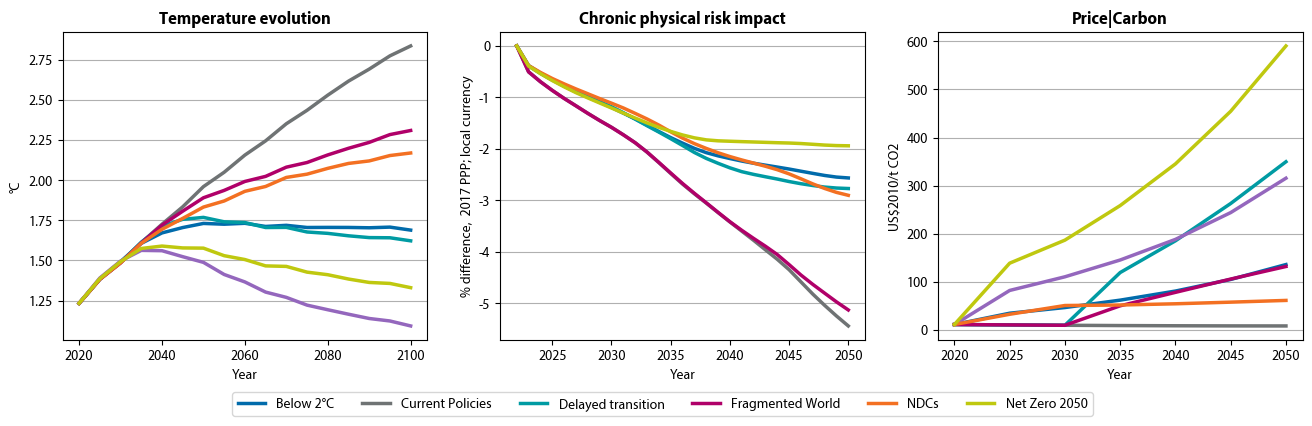

In [ ]:
title = "Temperature, chronic damages and carbon price development"
description = "add description here..."

import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

df_1 = df_p4.filter(model=REMIND_4, region='World', year=range(2020, 2101), variable='AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile', scenario=All_Scenarios).plot(color='scenario', legend=False, ax=ax1, linewidth=2.5)  # Increase linewidth
ax1.set_title(f'Temperature evolution', fontweight='bold')
ax1.set_ylabel('°C')
df_2 = df_nigem_p4.filter(model=REMIND_nigem_4, region='World', year=range(2020, 2101), variable='Gross Domestic Product (GDP)(chronic)', scenario=All_Scenarios).plot(color='scenario', legend=False, ax=ax2, linewidth=2.5)  # Increase linewidth
ax2.set_title(f'Chronic physical risk impact', fontweight='bold')
df_3 = df_p4.filter(model=REMIND_4, region='World', year=range(2020, 2051), variable='Price|Carbon', scenario=All_Scenarios).plot(color='scenario', legend=False, ax=ax3, linewidth=2.5)  # Increase linewidth
ax3.set_title(f'Price|Carbon', fontweight='bold')

ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')

# Display one legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels))

x = x + 1  # Figure numbering
save_figure_numbering()

### 1.2 Key results

In [ ]:
end11=x
SubChapter12 = "1.2 Key Results"
start12 = end11+1
end1 = x

## 2 What's new? Phase 3 vs 4

In [ ]:
Chapter2 = "2. What's new? Phase 3 versus 4"
end1 = x
start2=end1+1

Figure 2


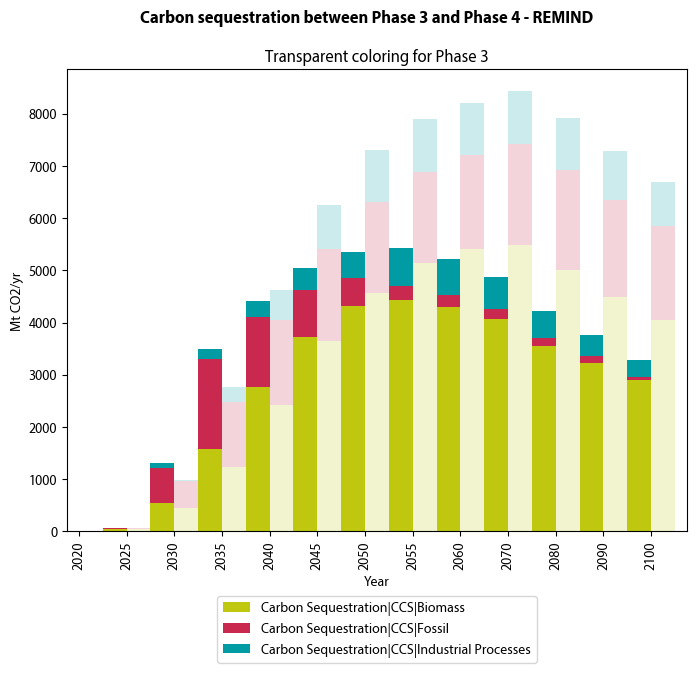

In [ ]:
title = "Temperature, chronic damages and carbon price development"
description = "add description here..."

df_Phase4 = df_p4.filter(
    model=REMIND_4, region = 'World', variable = ['Carbon Sequestration|CCS|Biomass', 'Carbon Sequestration|CCS|Fossil', 'Carbon Sequestration|CCS|Industrial Processes'],
    scenario = 'Net Zero 2050', year = range(2020, 2101)).as_pandas()

df_Phase3 = df_p3.filter(
    model=REMIND_3, region = 'World', variable = ['Carbon Sequestration|CCS|Biomass', 'Carbon Sequestration|CCS|Fossil', 'Carbon Sequestration|CCS|Industrial Processes'],
    scenario = 'Net Zero 2050', year = range(2020, 2101)).as_pandas()


import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for the relevant years
#years = [2020, 2025, 2030, 2050, 2100]
#df_Phase4_filtered = df_Phase4[df_Phase4['year'].isin(years)]
#df_Phase3_filtered = df_Phase3[df_Phase3['year'].isin(years)]

# Pivot the data for each phase
df_Phase4_pivot = df_Phase4.pivot(index='year', columns='variable', values='value')
df_Phase3_pivot = df_Phase3.pivot(index='year', columns='variable', values='value')

# Create the clustered stacked bar plot using Pandas
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Phase 4 data
df_Phase4_pivot.plot.bar(stacked=True, ax=ax, position=1, cmap=ngfs_cmap, label='Phase 4')
handles, labels = ax.get_legend_handles_labels()
# Plot Phase 3 data with reduced opacity (alpha)
df_Phase3_pivot.plot.bar(stacked=True, ax=ax, position=0, cmap=ngfs_cmap, alpha=0.2, label='Phase 3')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Mt CO2/yr')
plt.suptitle('Carbon sequestration between Phase 3 and Phase 4 - REMIND', fontweight = 'bold')
plt.title('Transparent coloring for Phase 3')
#plt.xticks(range(len(years)), years)
plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=1)

x = x + 1 #Figure numbering
save_figure_numbering()

## 3 Main Results

In [ ]:
Chapter3 = "3. Main results"
end2 = x
start3=end2+1

### 3.1 Key macrofinancial results

In [ ]:
SubChapter31 = "3.1 Key macrofinancial results"

#### 3.1.1 GDP

pyam.iiasa - INFO: You are connected to the IXSE_NGFS_PHASE_4 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as user `clehofer`


Figure 3


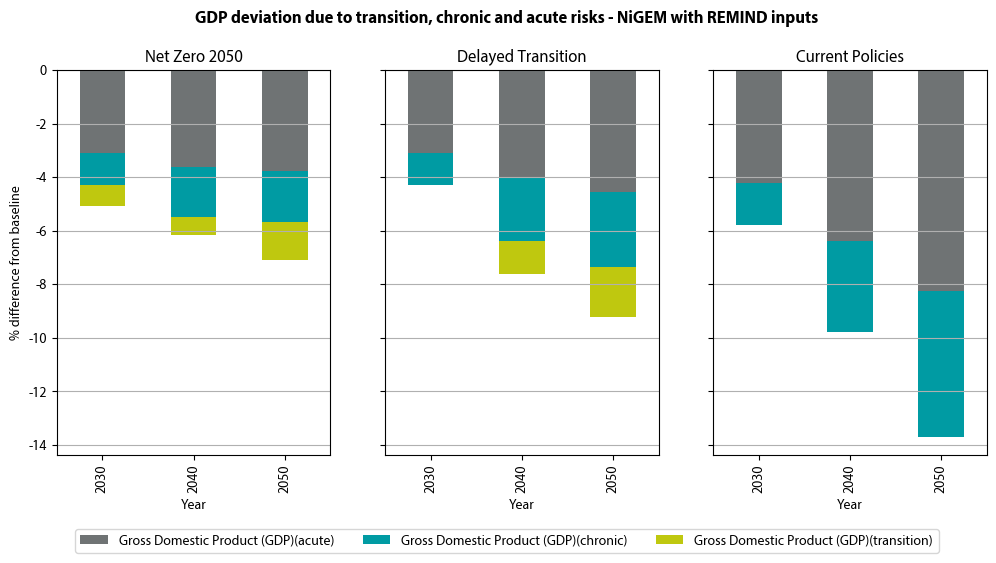

In [ ]:
title = "..."
description = "...."

df = pyam.read_iiasa(
    'ngfs_phase_4',
    model= ['NiGEM NGFS v1.23.2\[Climate Analytics\]','NiGEM NGFS v1.23.2\[REMIND-MAgPIE 3.2-4.6\]'],
    variable=['Gross Domestic Product (GDP)(chronic)', 'Gross Domestic Product (GDP)(transition)', 'Gross Domestic Product (GDP)(drought-90)', 'Gross Domestic Product (GDP)(heatwave-90)', 'Gross Domestic Product (GDP)(cyclone-90)', 'Gross Domestic Product (GDP)(flood)'],
    region="NiGEM NGFS v1.23.2|World",
    #year=(2030, 2050, 2100),
    scenario=['Net Zero 2050', 'Current Policies', 'Delayed transition']
)

df.add('Gross Domestic Product (GDP)(drought-90)', 'Gross Domestic Product (GDP)(heatwave-90)', 'Gross Domestic Product (GDP)(drought_heatwave)',append=True, ignore_units=True)
df.add('Gross Domestic Product (GDP)(drought_heatwave)', 'Gross Domestic Product (GDP)(cyclone-90)', 'Gross Domestic Product (GDP)(drought_heatwave_cyclone)',append=True, ignore_units=True)
df.add('Gross Domestic Product (GDP)(drought_heatwave_cyclone)', 'Gross Domestic Product (GDP)(flood)', 'Gross Domestic Product (GDP)(acute)',append=True, ignore_units="% difference")
df_1 = df.filter(scenario = 'Net Zero 2050', variable= ['Gross Domestic Product (GDP)(chronic)', 'Gross Domestic Product (GDP)(transition)', 'Gross Domestic Product (GDP)(acute)'],  year=(2030, 2040, 2050)).as_pandas()
df_2 = df.filter(scenario = 'Delayed transition', variable= ['Gross Domestic Product (GDP)(chronic)', 'Gross Domestic Product (GDP)(transition)', 'Gross Domestic Product (GDP)(acute)'],  year=(2030, 2040, 2050)).as_pandas()
df_3 = df.filter(scenario = 'Current Policies', variable= ['Gross Domestic Product (GDP)(chronic)', 'Gross Domestic Product (GDP)(transition)', 'Gross Domestic Product (GDP)(acute)'],  year=(2030, 2040, 2050)).as_pandas()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Pivot the DataFrame to prepare for stacking
pivot_df_1 = df_1.pivot(index='year', columns='variable', values='value')
pivot_df_2 = df_2.pivot(index='year', columns='variable', values='value')
pivot_df_3 = df_3.pivot(index='year', columns='variable', values='value')

# Define custom colors
custom_colors = {
    'Gross Domestic Product (GDP)(acute)': '#6F7374',
    'Gross Domestic Product (GDP)(chronic)': '#009BA3',
    'Gross Domestic Product (GDP)(transition)': '#BFC80F'
}

import matplotlib.pyplot as plt

# Create subplots with shared y-axis
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

# Create a stacked bar chart for pivot_df_1
ax1 = pivot_df_1.plot(kind='bar', stacked=True, color=[custom_colors[col] for col in pivot_df_1.columns], ax=axs[0], legend = False)
ax1.set_title('Net Zero 2050')
ax1.set_xlabel('Year')
ax1.set_ylabel('% difference from baseline')

# Create a stacked bar chart for pivot_df_2
ax2 = pivot_df_2.plot(kind='bar', stacked=True, color=[custom_colors[col] for col in pivot_df_2.columns], ax=axs[1], legend = False)
ax2.set_title('Delayed Transition')
ax2.set_xlabel('Year')

# Create a stacked bar chart for pivot_df_3
ax3 = pivot_df_3.plot(kind='bar', stacked=True, color=[custom_colors[col] for col in pivot_df_3.columns], ax=axs[2], legend = False)
ax3.set_title('Current Policies')
ax3.set_xlabel('Year')

ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')

# Get the legend from the first plot
handles, labels = ax1.get_legend_handles_labels()

# Create a common legend for all three plots
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
plt.suptitle('GDP deviation due to transition, chronic and acute risks - NiGEM with REMIND inputs', y=1,fontweight='bold')

x = x + 1 #Figure numbering
save_figure_numbering()

Figure 4


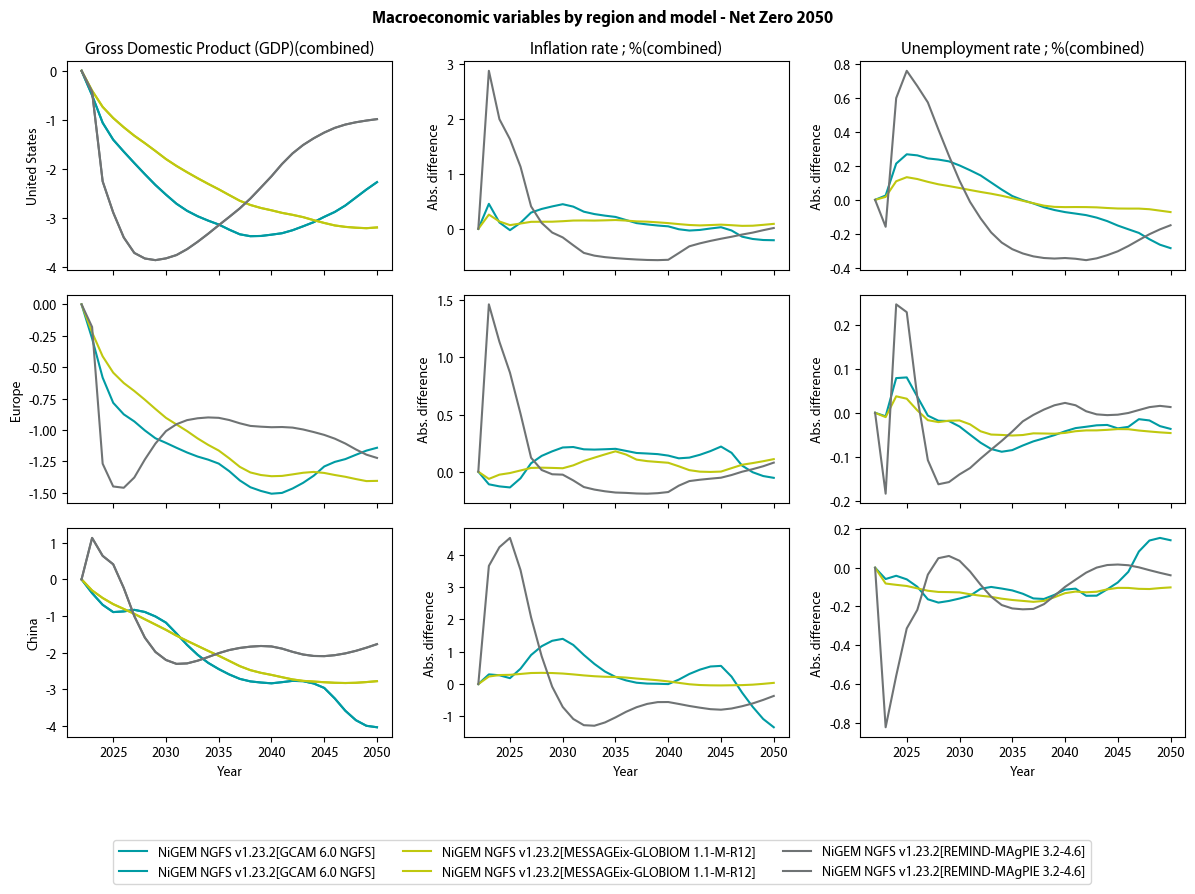

In [ ]:
title = "..."
description = "...."

# Set the variable to be compared and the region of interest
scenario = ['Net Zero 2050']
model = All_NiGEM_4

# The following constructs the scenario x model matrix
regions = ['United States', 'Europe', 'China']
variables = ['Gross Domestic Product (GDP)(combined)', 'Inflation rate ; %(combined)', 'Unemployment rate ; %(combined)']

# Filter the DataFrame for specific variable, models, scenarios, and region
df_filtered = df_nigem_p4.filter(variable=variables, region=regions, scenario=scenario, model=model)

# Set the number of rows and columns for the subplots
num_rows = len(regions)
num_cols = len(variables)

# Create the subplots with the desired matrix layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8), sharex=True, sharey=False)

# Iterate over regions and scenarios to plot the data and label the axes
for i, region in enumerate(regions):
    for j, variable in enumerate(variables):
        # Filter the data for the current region and scenario
        filtered_data = df_filtered.filter(region=region, variable=variable)

        # Plot the data on the corresponding subplot
        filtered_data.plot(ax=axes[i, j], color='model')

        # Labelling
        axes[i, j].get_legend().remove()
        axes[i, j].set_title("")
        if i == 0:
            axes[i, j].set_title(variable)
        if j == 0:
            axes[i, j].set_ylabel(region)

# Set the overall title for the matrix of subplots
fig.suptitle("Macroeconomic variables by region and model - Net Zero 2050", fontweight = 'bold')

# Add a common legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=len(variables))


# Adjust the spacing between subplots
plt.tight_layout()

x = x + 1 #Figure numbering
save_figure_numbering()

#### 3.1.2 Inflation and unemployment

Figure 5


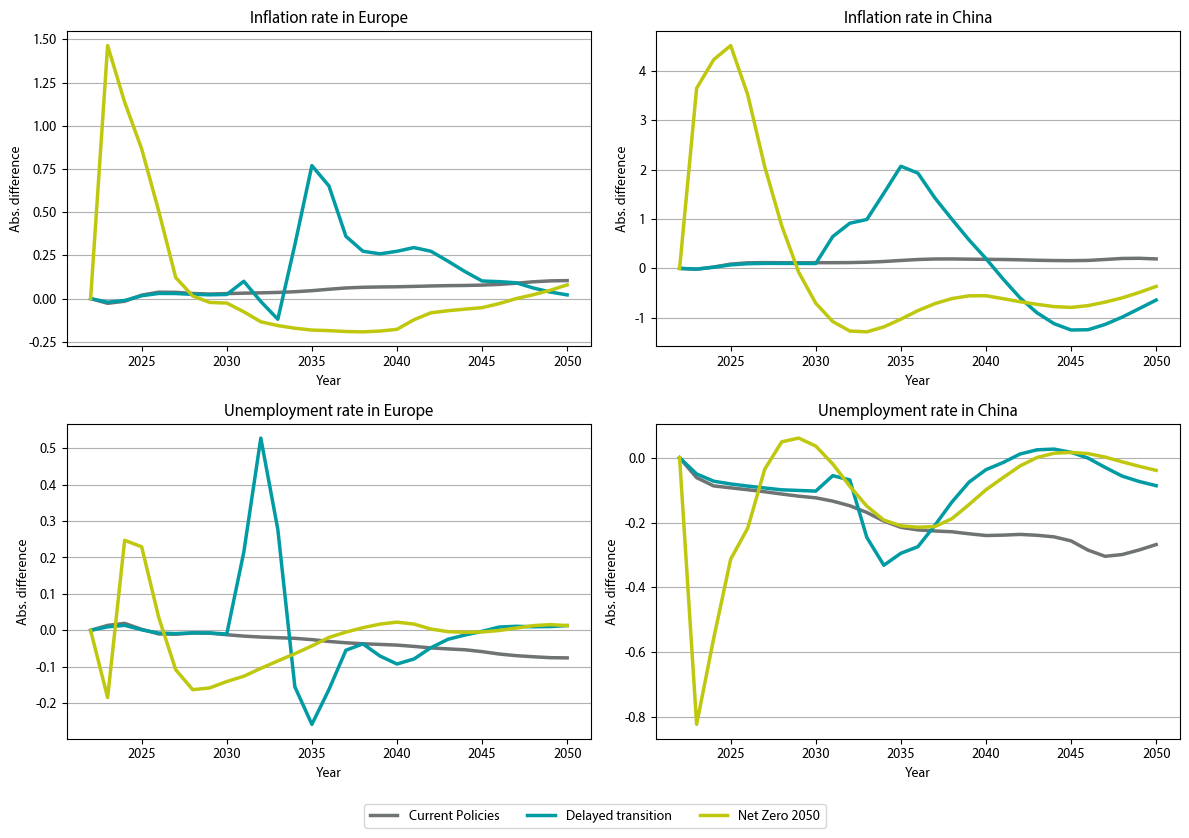

In [ ]:
# @title
title = "..."
description = "...."

import matplotlib.pyplot as plt

# Assuming df_nigem_p4 is a DataFrame containing the necessary data

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 3 columns

df = df_nigem_p4.filter(
    model=REMIND_nigem_4,
    variable=['Inflation rate ; %(combined)', 'Unemployment rate ; %(combined)'],
    region=['Europe','China'],
    year=range(2022, 2101),
    scenario=['Current Policies', 'Fragmented World','NDCs','Below 2°C','Low Demand','Delayed transition', 'Net Zero 2050']
)

df1 = df_nigem_p4.filter(
    model=REMIND_nigem_4,
    variable=['Inflation rate ; %(chronic)', 'Unemployment rate ; %(chronic)'],
    region=['Europe','China'],
    year=range(2022, 2101),
    scenario=['Current Policies']
)

df = df.append(df1)

# Plot 1
df.filter(
    variable=['Inflation rate ; %(combined)', 'Inflation rate ; %(chronic)'],
    region='Europe',
    year=range(2022, 2051),
    scenario=['Delayed transition', 'Current Policies', 'Net Zero 2050']
).plot(color='scenario', legend=False, ax=axs[0, 0], linewidth=2.5)
axs[0, 0].set_title('Inflation rate in Europe')
axs[0, 0].grid(axis='y')

# Plot 2
df.filter(
    variable=['Inflation rate ; %(combined)', 'Inflation rate ; %(chronic)'],
    region='China',
    year=range(2022, 2051),
    scenario=['Delayed transition', 'Current Policies', 'Net Zero 2050']
).plot(color='scenario', legend=False, ax=axs[0, 1], linewidth=2.5)
axs[0, 1].set_title('Inflation rate in China')
axs[0, 1].grid(axis='y')

# Plot 4
df.filter(
    model=REMIND_nigem_4,
    variable=['Unemployment rate ; %(combined)', 'Unemployment rate ; %(chronic)'],
    region='Europe',
    year=range(2022, 2051),
    scenario=['Delayed transition', 'Current Policies', 'Net Zero 2050']
).plot(color='scenario', legend=False, ax=axs[1, 0], linewidth=2.5)
axs[1, 0].set_title('Unemployment rate in Europe')
axs[1, 0].grid(axis='y')

# Plot 5
df.filter(
    model=REMIND_nigem_4,
    variable=['Unemployment rate ; %(combined)', 'Unemployment rate ; %(chronic)'],
    region='China',
    year=range(2022, 2051),
    scenario=['Delayed transition', 'Current Policies', 'Net Zero 2050']
).plot(color='scenario', legend=False, ax=axs[1, 1], linewidth=2.5)
axs[1, 1].set_title('Unemployment rate in China')
axs[1, 1].grid(axis='y')

# Get handles and labels from any of the subplots (they all have the same legend)
handles, labels = axs[0, 0].get_legend_handles_labels()

# Add a single legend for all plots
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels))

# Adjust the spacing between the subplots
fig.tight_layout()

x = x + 1 #Figure numbering
save_figure_numbering()

#### 3.1.3 Financial markets

Figure 6


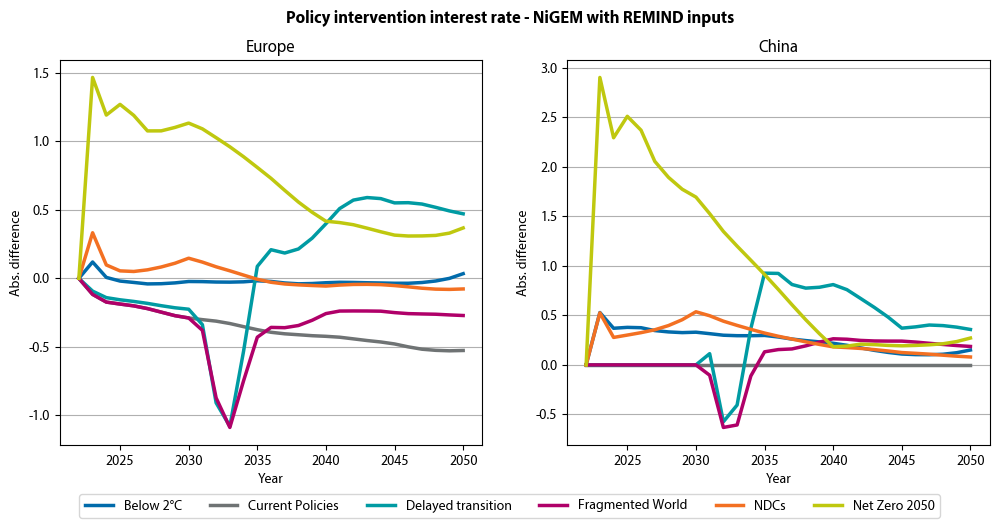

In [ ]:
# @title
title = "..."
description = "...."

# Create a figure and axes
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

df = df_nigem_p4.filter(
    model=REMIND_nigem_4,
    variable=['Central bank Intervention rate (policy interest rate) ; %(combined)'],
    region=['Europe','China'],
    year=range(2022, 2101),
    scenario=All_Scenarios
)

df1 = df_nigem_p4.filter(
    model=REMIND_nigem_4,
    variable=['Central bank Intervention rate (policy interest rate) ; %(chronic)'],
    region=['Europe','China'],
    year=range(2022, 2101),
    scenario=['Current Policies']
)

df = df.append(df1)

# Plot 1
df.filter(
    region='Europe',
    ).plot(color='scenario', legend=False, ax=ax1, linewidth=2.5)
ax1.set_title('Europe')
ax1.grid(axis='y')

# Plot 2
df.filter(
    region='China',
    ).plot(color='scenario', legend=False, ax=ax2, linewidth=2.5)
ax2.set_title('China')
ax2.grid(axis='y')

# Get handles and labels from the last plot (ax2)
handles, labels = ax2.get_legend_handles_labels()

# Add a single legend for all plots
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels))

plt.suptitle("Policy intervention interest rate - NiGEM with REMIND inputs", fontweight = 'bold')

x = x + 1 #Figure numbering
save_figure_numbering()

Figure 7


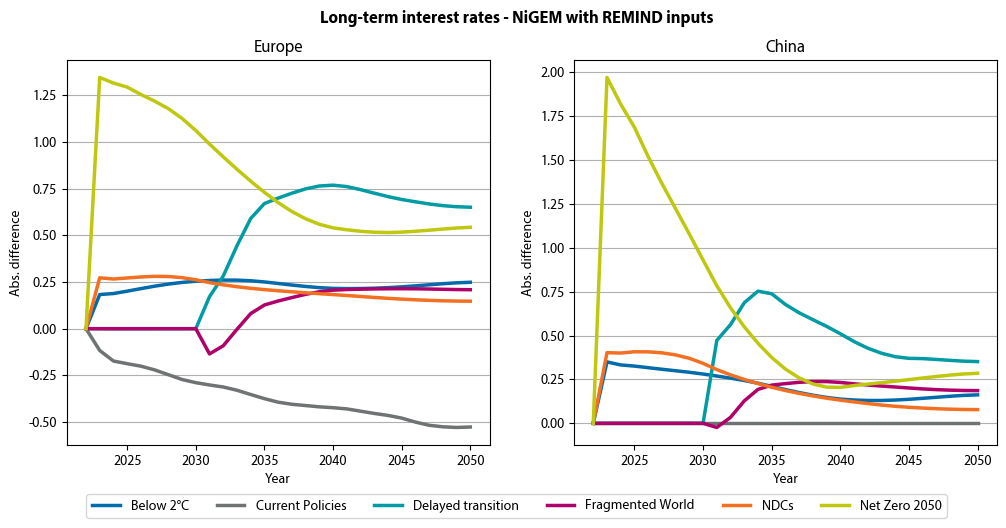

In [ ]:
# @title
title = "..."
description = "...."

# Create a figure and axes
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

df = df_nigem_p4.filter(
    model=REMIND_nigem_4,
    variable=['Long term interest rate ; %(combined)'],
    region=['Europe','China'],
    year=range(2022, 2101),
    scenario=All_Scenarios
)


df = df.append(df1)

# Plot 1
df.filter(
    region='Europe',
    ).plot(color='scenario', legend=False, ax=ax1, linewidth=2.5)
ax1.set_title('Europe')
ax1.grid(axis='y')

# Plot 2
df.filter(
    region='China',
    ).plot(color='scenario', legend=False, ax=ax2, linewidth=2.5)
ax2.set_title('China')
ax2.grid(axis='y')

# Get handles and labels from the last plot (ax2)
handles, labels = ax2.get_legend_handles_labels()

# Add a single legend for all plots
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels))

plt.suptitle("Long-term interest rates - NiGEM with REMIND inputs", fontweight = 'bold')

x = x + 1 #Figure numbering
save_figure_numbering()

### 3.2 Transition risk

In [ ]:
SubChapter32 = "3.2 Transition risk"
end31=x
start32=end31+1

Figure 8


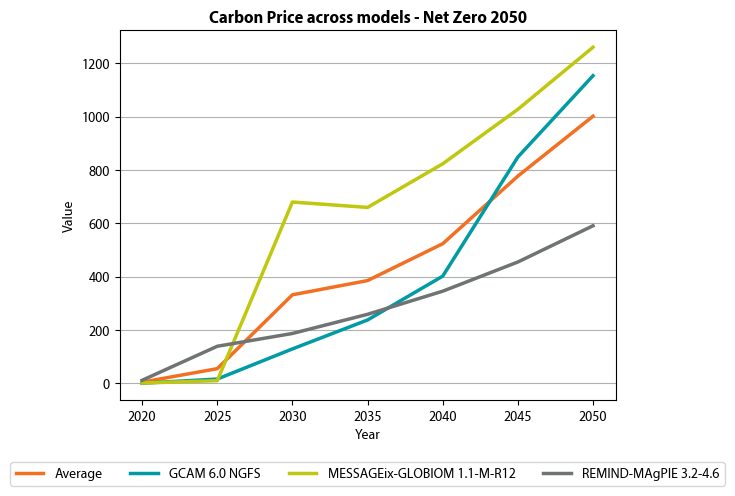

In [ ]:
title = "..."
description = "...."

import matplotlib.pyplot as plt

# Plot 2 - Carbon prices across models incl. an average

## For a function of the following see the EnTry function sheet

# Creating a helper data frames to calculate the average
df_test = df_p4.filter(
    scenario = 'Net Zero 2050', region = 'World',  year = range(2020, 2051), variable = 'Price|Carbon'
    ).filter(model = 'REMIND-MAgPIE 3.0-4.4 IntegratedPhysicalDamages (median)', keep = False
    )

df_REMIND = df_test.filter(model = REMIND_4).rename(variable={'Price|Carbon': 'Price|Carbon REMIND'}).rename(model={'REMIND-MAgPIE 3.2-4.6': 'Average'})
df_MESSAGE = df_test.filter(model = MESSAGE_4).rename(variable={'Price|Carbon': 'Price|Carbon MESSAGE'}).rename(model={'MESSAGEix-GLOBIOM 1.1-M-R12': 'Average'})
df_GCAM = df_test.filter(model = GCAM_4).rename(variable={'Price|Carbon': 'Price|Carbon GCAM'}).rename( model={'GCAM 6.0 NGFS': 'Average'})

df_new = df_REMIND.append(df_MESSAGE, ignore_meta_conflict=True)
df_new = df_new.append(df_GCAM, ignore_meta_conflict=True)

df_new.add('Price|Carbon REMIND', 'Price|Carbon MESSAGE', 'Sum', ignore_units=True, append = 'True')
df_new.add('Sum', 'Price|Carbon GCAM', 'Sum_final', ignore_units=True, append = 'True')

df_new.divide('Sum_final', 3, "Average", ignore_units=True, append = 'True')

df_avg = df_new.filter(variable = 'Average')
df_test = df_test.append(df_avg)

# Plotting
df_test.plot(color='model', linewidth=2.5)

plt.grid(axis = 'y')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.title("Carbon Price across models - Net Zero 2050", fontweight='bold')

x = x + 1 #Figure numbering
save_figure_numbering()

### 3.3 Physical risk

In [ ]:
SubChapter33 = "3.3 Physical risk"
end32 = x
start33 = end32+1

Figure 9


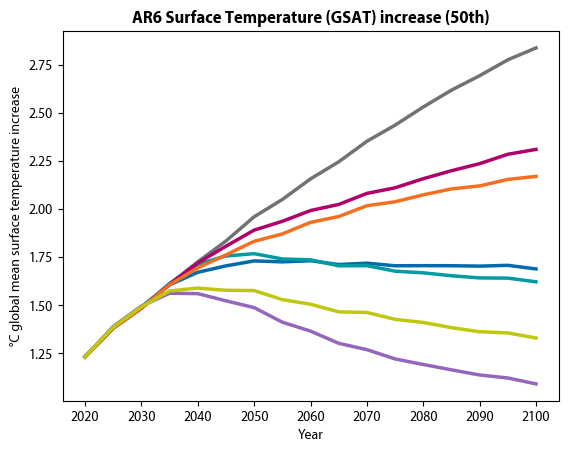

In [ ]:
title = "..."
description = "...."

df_p4.filter(model=REMIND_4, region='World', year=range(2020, 2101), variable='AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile', scenario=All_Scenarios).plot(color='scenario', legend=False, linewidth=2.5)
plt.title(f'AR6 Surface Temperature (GSAT) increase (50th)', fontweight='bold')
plt.ylabel('°C global mean surface temperature increase')

x = x + 1 #Figure numbering
save_figure_numbering()

Figure 10


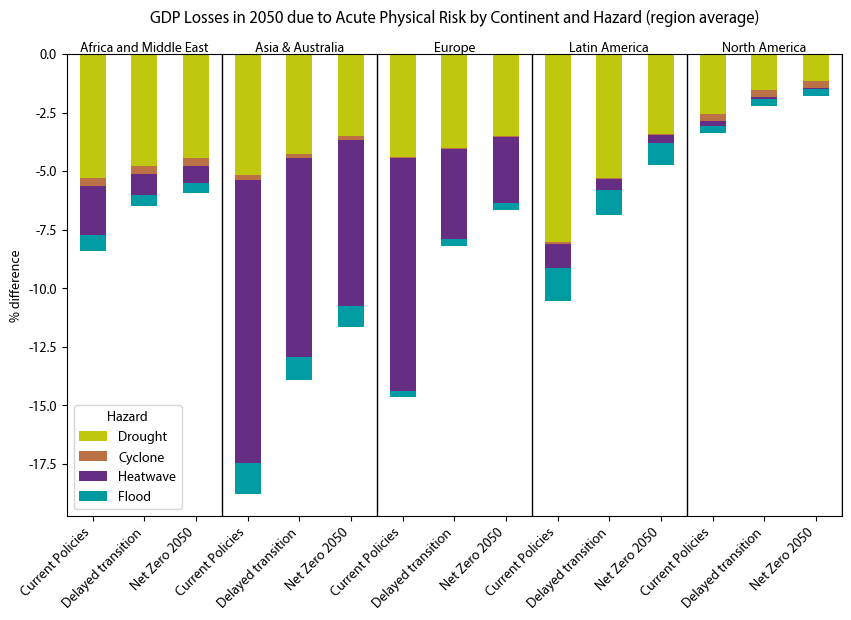

In [ ]:
title = "..."
description = "...."

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = df_nigem_p4.filter(variable=['Gross Domestic Product (GDP)(drought-90)',
                             'Gross Domestic Product (GDP)(heatwave-90)',
                             'Gross Domestic Product (GDP)(cyclone-90)',
                             'Gross Domestic Product (GDP)(flood)'],
                   model='NiGEM NGFS v1.23.2[Climate Analytics]',
                   scenario=All_Scenarios, year=range(2023, 2051)).rename(variable = {'Gross Domestic Product (GDP)(drought-90)':'Drought',
                                                                                      'Gross Domestic Product (GDP)(heatwave-90)':'Heatwave',
                                                                                      'Gross Domestic Product (GDP)(cyclone-90)':'Cyclone',
                                                                                      'Gross Domestic Product (GDP)(flood)':'Flood'}).rename(
                                                                                          region = {'NiGEM NGFS v1.23.2|Africa': 'Africa'}
                                                                                     )


df_1 = df.filter(year = 2050
                 ).filter(region = ['NiGEM NGFS v1.23.2|Asia', 'NiGEM NGFS v1.23.2|Europe', 'NiGEM NGFS v1.23.2|Developing Europe', 'NiGEM NGFS v1.23.2|Latin America', 'Africa', 'Asia', 'Developing Europe', 'World'], keep = False
                          ).as_pandas()

region_to_continent = {
    'United States': 'North America',
    'NiGEM NGFS v1.23.2|Canada': 'North America',
    'Germany': 'Europe',
    'China': 'Asia & Australia',
    'Japan': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Argentina': 'Latin America',
    'NiGEM NGFS v1.23.2|Australia': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Austria': 'Europe',
    'NiGEM NGFS v1.23.2|Belgium': 'Europe',
    'NiGEM NGFS v1.23.2|Brazil': 'Latin America',
    'NiGEM NGFS v1.23.2|Bulgaria': 'Europe',
    'NiGEM NGFS v1.23.2|Chile': 'Latin America',
    'NiGEM NGFS v1.23.2|China': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Croatia': 'Europe',
    'NiGEM NGFS v1.23.2|Czech Republic': 'Europe',
    'NiGEM NGFS v1.23.2|Denmark': 'Europe',
    'NiGEM NGFS v1.23.2|Egypt': 'Africa and Middle East',
    'NiGEM NGFS v1.23.2|Estonia': 'Europe',
    'NiGEM NGFS v1.23.2|Finland': 'Europe',
    'NiGEM NGFS v1.23.2|France': 'Europe',
    'NiGEM NGFS v1.23.2|Germany': 'Europe',
    'NiGEM NGFS v1.23.2|Greece': 'Europe',
    'NiGEM NGFS v1.23.2|Hong Kong': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Hungary': 'Europe',
    'NiGEM NGFS v1.23.2|India': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Indonesia': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Ireland': 'Europe',
    'NiGEM NGFS v1.23.2|Italy': 'Europe',
    'NiGEM NGFS v1.23.2|Japan': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Latvia': 'Europe',
    'NiGEM NGFS v1.23.2|Lithuania': 'Europe',
    'NiGEM NGFS v1.23.2|Malaysia': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Mexico': 'Latin America',
    'NiGEM NGFS v1.23.2|Middle East': 'Africa and Middle East',
    'NiGEM NGFS v1.23.2|Netherlands': 'Europe',
    'NiGEM NGFS v1.23.2|New Zealand': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Norway': 'Europe',
    'NiGEM NGFS v1.23.2|Poland': 'Europe',
    'NiGEM NGFS v1.23.2|Portugal': 'Europe',
    'NiGEM NGFS v1.23.2|Romania': 'Europe',
    'NiGEM NGFS v1.23.2|Russia': 'Europe',
    'NiGEM NGFS v1.23.2|Singapore': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Slovakia': 'Europe',
    'NiGEM NGFS v1.23.2|Slovenia': 'Europe',
    'NiGEM NGFS v1.23.2|South Africa': 'Africa and Middle East',
    'NiGEM NGFS v1.23.2|South Korea': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Spain': 'Europe',
    'NiGEM NGFS v1.23.2|Sweden': 'Europe',
    'NiGEM NGFS v1.23.2|Switzerland': 'Europe',
    'NiGEM NGFS v1.23.2|Taiwan': 'Asia & Australia',
    'NiGEM NGFS v1.23.2|Turkey': 'Europe',
    'NiGEM NGFS v1.23.2|United Kingdom': 'Europe',
    'NiGEM NGFS v1.23.2|United States': 'North America',
    'NiGEM NGFS v1.23.2|Viet Nam': 'Asia & Australia',
    }

def map_region_to_continent(region):
  cleaned_region = region.strip()
  return region_to_continent.get(region, 'na')

df_1['continent'] = df_1['region'].apply(map_region_to_continent)

# Group by 'continent' and 'variable' and calculate the average of 'value'
result_df = df_1.groupby(['continent', 'variable', 'scenario'])['value'].agg('mean').reset_index()

result_df = result_df.rename(columns={'value': 'average'})
result_df = result_df[result_df['continent'] != 'na']

# Pivot the DataFrame to have 'variable' as columns and 'scenario' as index
pivot_df = result_df.pivot(index=['continent', 'scenario'], columns='variable', values='average')

# Specify the desired order of variables
desired_order = ['Drought', 'Cyclone', 'Heatwave', 'Flood']

# Reorder the columns in the pivot DataFrame
pivot_df = pivot_df[desired_order]

# Create a grouped stack bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), cmap = ngfs_cmap)

# Set labels and title
plt.xlabel('')
plt.ylabel('% difference')
plt.title('GDP Losses in 2050 due to Acute Physical Risk by Continent and Hazard (region average)', y=1.05, wrap = True)

# Show the legend
plt.legend(title='Hazard')

# Add a line between every third bar
for i, bar in enumerate(ax.patches):
    if (i + 1) % 3 == 0:
        ax.axvline(x=i + 0.5, color='black', linewidth=1)

# Customize x-axis labels
x_labels = pivot_df.index.get_level_values('scenario')

ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Show continent names as titles above groups of three bars
continent_titles = pivot_df.index.get_level_values('continent').unique()
for i, continent in enumerate(continent_titles):
    ax.text(i * 3 + 1, ax.get_ylim()[1] + 0.1, continent, ha='center')

x = x + 1 #Figure numbering
save_figure_numbering()

In [ ]:
end3 = x

### Template

In [ ]:
# TEMPLATE CODEFOR FIGURES

#title = "..."
#description = "...."

####

## Add plot generating code here ##

#####

#x = x + 1 #Figure numbering
#save_figure_numbering()

# Report Generation

### Functions and installation

In [ ]:
!pip install fpdf
!pip install kaleido
!pip install dataframe_image

import fpdf
from fpdf import FPDF
import time
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=7b26f811b0578d31f13d9818e38cf5bdd699861e60049c4a7f513ccb7300630b
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.5/398.5 kB 33.8 MB/s eta 0:00:00


In [ ]:
# FUNCTIONS

# Import NGFS-styled header
!wget https://user-images.githubusercontent.com/136795059/275571786-86c52edc-6320-4fd5-a3bc-1b524ca82909.png
!wget https://user-images.githubusercontent.com/136795059/275571537-f53f9cd7-faa4-4a17-90ff-355177bd6103.png

#![]({https://user-images.githubusercontent.com/136795059/275571786-86c52edc-6320-4fd5-a3bc-1b524ca82909.png})
#![]({https://user-images.githubusercontent.com/136795059/275571537-f53f9cd7-faa4-4a17-90ff-355177bd6103.png})

def create_header(pdf, WIDTH):
    pdf.image("/content/275571537-f53f9cd7-faa4-4a17-90ff-355177bd6103.png", 0, 0, WIDTH)

def create_title(title1,title2, title3, pdf):

    # Add main title
    pdf.set_font('Helvetica', 'b', 20)
    pdf.set_x((pdf.w - pdf.get_string_width(title1)) / 2)  # Center-align title1
    pdf.write(5, title1)
    pdf.ln(10)

    pdf.set_x((pdf.w - pdf.get_string_width(title2)) / 2)  # Center-align title2
    pdf.write(5, title2)
    pdf.ln(10)

    pdf.set_font('Helvetica', 'i', 20)
    pdf.set_x((pdf.w - pdf.get_string_width(title3)) / 2)  # Center-align title3
    pdf.write(5, title3)
    pdf.ln(20)

    # Add date of report
    pdf.set_font('Helvetica', '', 10)
    pdf.set_text_color(r=128,g=128,b=128)
    today = time.strftime("%d/%m/%Y")
    pdf.set_x((pdf.w - pdf.get_string_width('This report was automatically generated by NGFS EnTry on')) / 2)
    pdf.write(4, f'This report was automatically generated by NGFS EnTry on')
    pdf.ln(10)
    pdf.set_x((pdf.w - pdf.get_string_width('xx/xx/xxxx')) / 2)
    pdf.write(4, f'{today}')
    pdf.ln(20)

    # Add link to colab script
    pdf.set_font('Helvetica', 'i', 8)
    pdf.set_text_color(r=128, g=128, b=128)
    link_url = "https://colab.research.google.com/drive/1iM6dEmthZE9DCZjDH1rwYpZI0eV3etEx?usp=sharing"
    center_x = (pdf.w - pdf.get_string_width('Find the EnTry code script here')) / 2
    pdf.set_xy(center_x, pdf.get_y())
    pdf.cell(pdf.get_string_width('Find the EnTry code script here'), 4, 'Find the EnTry code script here.', link=link_url)


def add_table_of_contents(pdf, title, sections):
    # Add TOC page
    pdf.add_page()
    create_header(pdf, WIDTH)
    pdf.ln(margin_to_header)

    # Add main title for TOC
    pdf.set_font('Helvetica', 'b', 20)
    pdf.write(5, title)
    pdf.ln(10)

    # Add table of contents entries
    pdf.set_font('Helvetica', '', 12)
    for entry, page in sections.items():
        pdf.cell(0, 10, entry, ln=True)
        pdf.cell(0, 0, f"{page}", ln=True)
        pdf.ln(5)

#def add_table_of_contents(pdf, title, sections):
      # Add TOC page
#     pdf.add_page()
#      create_header(pdf, WIDTH)
#      pdf.ln(margin_to_header)
#      pdf.set_font("Arial", size=12, style="B")
#      pdf.cell(0, 10, txt="Table of Contents", ln=True, align="C")

      # Add chapters and subchapters to the table of contents
#      pdf.set_font("Arial", size=12)
#      for chapter in pdf.chapters:
#          pdf.cell(0, 10, txt=f"Chapter: {chapter}", ln=True)
#          for subchapter in pdf.subchapters:
#              pdf.cell(10)  # Indent subchapters
#              pdf.cell(0, 10, txt=f"Subchapter: {subchapter}", ln=True)

def new_page():
    # add new page
    add_page_number()
    pdf.add_page()
    create_header(pdf, WIDTH)
    pdf.ln(margin_to_header)

def footer(self):
    # Add page number on the bottom of the page
    pdf.set_y(-15)  # 15 units from the bottom
    pdf.set_font("Arial", style="I", size=10)
    page_number = f"Page {self.page_no()}"
    pdf.cell(0, 10, txt=page_number, align="C")

#def set_chapter(title):
#    # Add a chapter title to the document
#    pdf.add_page()
#    pdf.set_font("Arial", size=12, style="B")
#    pdf.cell(0, 10, txt=title, ln=True, align="C")
#    pdf.chapters.append(title)

#def set_subchapter(title):
#    # Add a subchapter title to the document
#    pdf.add_page()
#    pdf.set_font("Arial", size=10, style="")
#    pdf.cell(0, 10, txt=title, ln=True)
#    pdf.subchapters.append(title)

def add_page_number():
    # Set the font and position for the page number
    pdf.set_font("Arial", style="I", size=10)
    pdf.set_y(-15)  # 15 units from the bottom

    # Add the page number on the current sheet
    page_number = f"{pdf.page_no()}"
    pdf.cell(0, -10, txt=page_number, align="C")

def write_to_pdf(pdf, font, style, size, words):
    # Set text colour, font size, and font type
    pdf.set_text_color(r=0,g=0,b=0)
    pdf.set_font(font, style, 10)
    pdf.write(5, words)

def add_figure_and_description(y):
    # Set font size and type for the title and description
    pdf.set_font("Arial","b", size=10)

    # Add the title
    pdf.cell(0, 10, txt=f'Figure {y}: '+title_figure[y], ln=True, align="C")
#    pdf.cell(0, 10, txt="", ln=True)

    pdf.set_font("Arial","i", size=10)
    # Add the description
    pdf.multi_cell(0, 5, txt=description_figure[y])
    pdf.ln(5)

    # Add the plot
    plot_height =  70  # You can adjust the height of the plot
    max_width = pdf.w - 2 * margin_to_sides
    aspect_ratio = plt.imread(f'Figure {y}.png').shape[1] / plt.imread(f'Figure {y}.png').shape[0]
    plot_width = min(max_width, plot_height * aspect_ratio)
    x_start = (pdf.w - plot_width) / 2
    y_start = pdf.get_y()
    pdf.image(f'Figure {y}.png', x=x_start, y=y_start, w=plot_width, h=plot_height, type ='PNG')

    # Update the Y position for the next content
    pdf.set_y(max(y_start + plot_height+15, y))  # Using 'max' to ensure we move below the plot


def add_figures_range(start, end):
    for y in range(start, end + 1, 2):
        # Add two figures per page
        add_figure_and_description(y)

        # Check if we have another figure for the second column
        if y + 1 <= end:
            add_figure_and_description(y + 1)

        # Add a new page after every two figures
        new_page()

#def add_ngfs_font():
#    pdf = FPDF()
#    # Replace 'YourFontName' with the desired name for your font (e.g., 'MyCustomFont').
#    font_name = 'Myriad Pro'
#    # Replace 'path/to/your/font.ttf' with the actual path to your TTF font file.
#    pdf.add_font(font_name, '', '/content/MyriadPro-Regular.ttf', uni=True)
#    pdf.add_font(font_name, 'B', '/content/MyriadPro-Bold.ttf', uni=True)
#    pdf.add_font(font_name, 'I', '/content/MyriadPro-Bold.ttf', uni=True)

--2023-11-07 08:16:10--  https://user-images.githubusercontent.com/136795059/275571786-86c52edc-6320-4fd5-a3bc-1b524ca82909.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73299 (72K) [image/png]
Saving to: ‘275571786-86c52edc-6320-4fd5-a3bc-1b524ca82909.png’

275571786-86c52edc- 100%[===================>]  71.58K  --.-KB/s    in 0.003s  

2023-11-07 08:16:11 (25.1 MB/s) - ‘275571786-86c52edc-6320-4fd5-a3bc-1b524ca82909.png’ saved [73299/73299]

--2023-11-07 08:16:11--  https://user-images.githubusercontent.com/136795059/275571537-f53f9cd7-faa4-4a17-90ff-355177bd6103.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to us

In [ ]:
#Add font to FPDF

#!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-Regular.ttf
#!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-It.ttf
#!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-Bold.ttf

#$fpdf->AddFont('Myriad Pro','','MyriadPro-Regular.ttf'); //Regular
#$fpdf->AddFont('Myriad Pro','B','MyriadPro-Bold.ttf'); //Bold
#$fpdf->AddFont('Myriad Pro','I','MyriadPro-It.ttf'); //Italic

#//Now use it as normal font
#$fpdf->SetFont('Myriad Pro','B',11);

### PDF Generation

In [ ]:
# @title
'''
INITIALISATION of PDF
'''

# Global Variables
TITLE_1 = "NGFS Scenarios Phase 4"
TITLE_2 = "Report"
TITLE_3 = "Template"
WIDTH = 210    # A4 = 210 by 297 mm)
HEIGHT = 297

margin_to_header = 15
margin_to_sides = 20

# Create PDF
pdf = FPDF()

# Set font
pdf.set_font("Helvetica", size = 25)

# Dictionary to store table of contents entries and their page numbers
table_of_contents = {}


'''
TITLE Page of PDF
'''
# Add Page
pdf.add_page()
pdf.ln(80)
create_title(TITLE_1, TITLE_2, TITLE_3, pdf)
pdf.ln(20)
pdf.image("275571786-86c52edc-6320-4fd5-a3bc-1b524ca82909.png", (WIDTH-50)/2, 50, 50)

'''
CONTENT
'''
'''
New Page
'''
y=0

# Add Page
new_page()

# Add some words to PDF

# CHAPTER 1
write_to_pdf(pdf, 'Arial', 'b', '16', Chapter1)
pdf.ln(10)

# Chapter 1.1
write_to_pdf(pdf, 'Arial', '', '14', SubChapter11)
pdf.ln(10)
add_figures_range(start1, end11)

# Chapter 1.2
write_to_pdf(pdf, 'Arial', '', '14', SubChapter12)
pdf.ln(10)
add_figures_range(start12, end1)



# CHAPTER 2
write_to_pdf(pdf, 'Arial', 'b', '16', Chapter2)
pdf.ln(10)
add_figures_range(start2, end2)



# CHAPTER 3
write_to_pdf(pdf, 'Arial', 'b', '14', Chapter3)
pdf.ln(10)

# Chapter 3.1
write_to_pdf(pdf, 'Arial', '', '14', SubChapter31)
pdf.ln(10)

# Chapter 3.2
write_to_pdf(pdf, 'Arial', '', '14', SubChapter32)
pdf.ln(10)

add_figures_range(start32, end32)

# Chapter 3.3
write_to_pdf(pdf, 'Arial', '', '14', SubChapter33)
pdf.ln(10)

add_figures_range(start33, end3)


# List of figures
new_page()
write_to_pdf(pdf, 'Arial', 'b', '16', 'List of figures')
pdf.ln(10)
pdf.set_font("Arial", '', 10)
last = y

# Add last page number and Generate the PDF
add_page_number()
pdf.output("Report.pdf", 'F')

''

#  

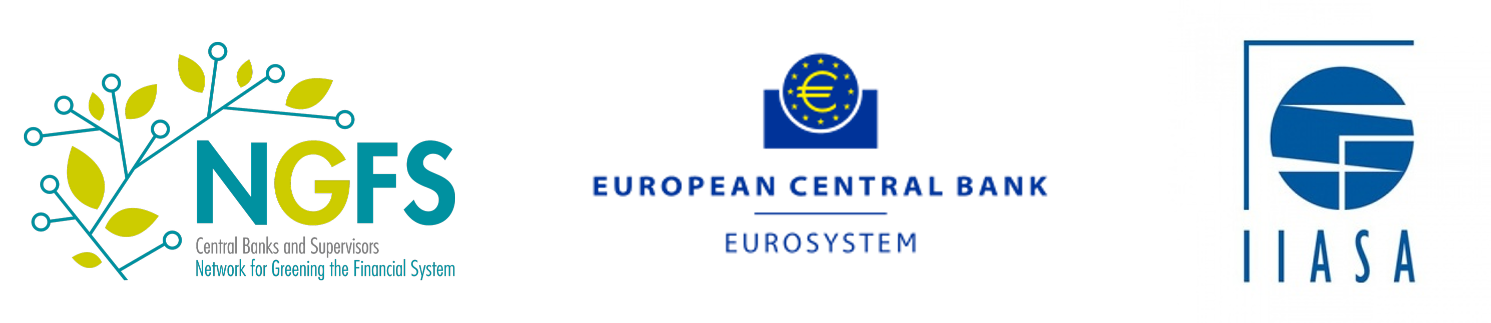